In [3]:
# LIBRERIAS
import matplotlib
from ipywidgets import interact,widgets
import numpy as np
import matplotlib.pylab as plt
import celluloid as cell  #animations
import pandas as pd
import os
from scipy.interpolate import CubicSpline

path=os.getcwd()
#sns.set_theme()
#matplotlib.rc('xtick', labels
# ize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
import seaborn as sns
import os
path=os.getcwd()



def fourierT(f):

    return (np.fft.fftshift(np.fft.ifft(np.fft.fftshift(f))))


def fourierI(f):

    return (np.fft.fftshift(np.fft.fft(np.fft.fftshift(f))))



# Caracterización de algunos parametros relavantes de la simulación.

In [4]:
frep=37.5*1e6
tau1=150e-15 ; tau2=200e-15
WaveLength=1550e-9      #reference wavelength [m]
c = 299792458
w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
length = 2.0             #ibre length [m]
D=-1.0*1e-12*1e9*1e-3 #Dispersion
dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
#betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
beta2=-WaveLength**2/(2*np.pi*c)*D
P0=130e-3
Ppeak=P0/(frep*tau1)
Ld=tau1**2/beta2
Lnl=1/(Ppeak*10.8*1e-3)
gamma=10.8*1e-3

In [5]:
Ld/Lnl

4403.158044539654

In [6]:
Lnl

0.004006410256410256

/home/esteban/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


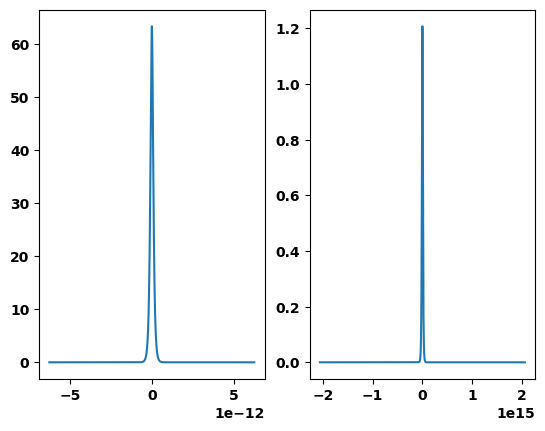

In [28]:
#Constants
c = 299792458;            
n = 2**13    # number of grid points
TimeWindow = 12.5e-12 # width of time window [s]     
dT = TimeWindow/n
TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid
WaveLength=1550e-9      #reference wavelength [m]
global w0 
w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
nu=100e6 #Repetition rate (Hz)
t0 =200e-15       # duration of input [s]
power = 80e-3/(nu*t0)        #peak power of input [W]
A = np.sqrt(power)*1/np.cosh(TimeGrid/(t0/2.634)) # input field [W^(1/2)]
V=2*np.pi*np.arange(-n/2,n/2,1).T/(n*dT)  # frequency grid

f=plt.figure()

plt.subplot(121)
plt.plot(TimeGrid,A)

plt.subplot(122)
plt.plot(V,fourierT(A))

# Coupled equations.

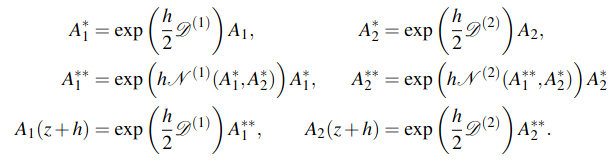

# Experimento.

In [4]:
def fourier_splitC(A01,A02,gamma,beta2,beta3,WL,lenght,k):

    c = 299792458
   
    dz=0.001

    V=np.sort(np.pi*c/(WL))  #Frequencies.

    midV=(np.max(V)+np.min(V))/2

    V=V - midV# frequency grid

    A1=fourierI(A01)*k

    A2=fourierI(A02)*k

    UD1=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)

    UD2=np.exp(dz*0.5*(1j*V**2*0.5*beta2-1j*beta3/6*V**3),dtype=complex)
    
    zz=0

    while zz<=lenght:

        A1a=fourierI(UD1*fourierT(A1))

        A2a=fourierI(UD1*fourierT(A2))

        N1=1j*gamma*(np.abs(A1a)**2+2*np.abs(A2a)**2)

        A1aa=np.exp(dz*N1)*A1a

        N2=1j*gamma*(np.abs(A2a)**2+2*np.abs(A1aa)**2)

        A2aa=np.exp(dz*N2)*A2a

        A1=fourierI(UD1*fourierT(A1aa))

        A2=fourierI(UD2*fourierT(A2aa))

        zz+=dz
        
    return fourierT(A1),fourierT(A2)


def Delta_landa1(y_data,x_data):

    
    cs=CubicSpline(x_data,y_data)
    new_xdata=np.linspace(min(x_data),max(x_data),len(x_data)*3)
    Y=cs(new_xdata)
    medium_value=np.max(Y)*0.01
    M_V=[]
    wl_s=[]
    pow_s=[]
    
    for i in range(len(Y)):
        if Y[i]>medium_value:
            
            M_V.append(i)
            wl_s.append(new_xdata[i])
            pow_s.append(Y[i])
            

    x1=new_xdata[np.min(M_V)]; 
    x2=new_xdata[np.max(M_V)]
    return abs(x2-x1)


    
def cubic(x_data,y_data,N):

    cs=CubicSpline(x_data,y_data)
    new_xdata=np.linspace(min(x_data),max(x_data),N)
    Y=cs(new_xdata)

    return new_xdata, Y


NameError: name 'c' is not defined

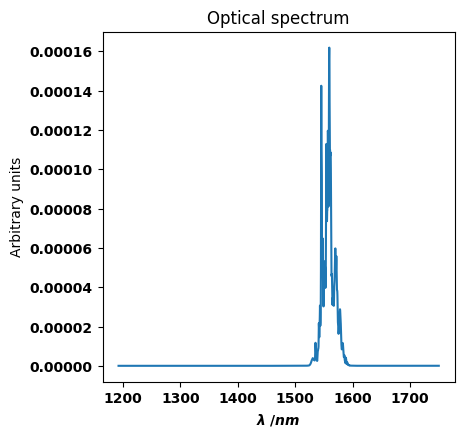

In [5]:
paths_amps=[]

for i in range(0,38):
    for j in range(0,50):
        paths_amps.append('MUESTRA_'+str(0)+'_'+str(i)+'_'+str(j)+'.csv')

del paths_amps[0]; del paths_amps[0]

s=np.random.choice(paths_amps)
df = pd.read_csv(path+'/Pulsos_amp'+"/"+s,skiprows=27)
df1 = pd.read_csv(path+'/Supercontinuo_1'+'/'+s,skiprows=27)
power=np.array(df['1749.9'][:])*1e-3 # Espectro amplificado
power_s1= np.array(df1['1749.9'][:])*1e-3 # Espectro supercontinuo.
WL_S1=np.array(df1['Stop'][:])  #Wavelenght


medium_value=np.max(power_s1)*0.01


f=plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(WL_S1,power)
plt.title('Optical spectrum')
plt.xlabel('$\lambda$ $/nm$')
plt.ylabel('Arbitrary units')

V=np.sort(2*np.pi*c/(1e-9*WL_S1))  #Frequencies.
midV=(np.max(V)+np.min(V))/2

V=V - midV# frequency grid
n = len(WL_S1)   # number of grid points
dT = np.pi/V[-1]
TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid

plt.subplot(222)
plt.plot(TimeGrid,(fourierI(power)))
plt.title('Pulse')
plt.xlabel('Time /s')



plt.subplot(223)

WL_S1, power = cubic(WL_S1,power,2**14)
plt.plot(WL_S1,power)
plt.title('Optical spectrum')
plt.xlabel('$\lambda$ $/nm$')
plt.ylabel('Arbitrary units')

V=np.sort(2*np.pi*c/(1e-9*WL_S1))  #Frequencies.
midV=(np.max(V)+np.min(V))/2
V=V - midV# frequency grid
n = len(WL_S1)   # number of grid points
dT = np.pi/V[-1]
TimeGrid =  np.arange(-n/2,n/2,1)*dT #  time grid

plt.subplot(224)
plt.plot(TimeGrid,(fourierI(power)))
plt.title('Pulse')
plt.xlabel('Time /s')

In [6]:
paths_amps=[]

for i in range(0,38):
    for j in range(0,50):
        paths_amps.append('MUESTRA_'+str(0)+'_'+str(i)+'_'+str(j)+'.csv')

del paths_amps[0]; del paths_amps[0]

s=np.random.choice(paths_amps)
df = pd.read_csv(path+'/Pulsos_amp'+"/"+s,skiprows=27)
df1 = pd.read_csv(path+'/Supercontinuo_1'+'/'+s,skiprows=27)
power=np.array(df['1749.9'][:])*1e-3 # Espectro amplificado
power_s1= np.array(df1['1749.9'][:])*1e-3 # Espectro supercontinuo.
WL_S1=np.array(df1['Stop'][:])  #Wavelenght

WL_S1, power = cubic(WL_S1,power,2**10)

WL_S1=np.array(df1['Stop'][:])  #Wavelenght

WL_S1, power_s1= cubic(WL_S1,power_s1,2**10)



In [ ]:
def anim2(a,k,C2,C):

    pulse=np.sqrt(power)#a*np.exp(-(WL_in-WL_central)**2/(2*b**2)*(1+1j*C))
    
    pulse2=a*np.sqrt(power)*np.exp(1j*C) #cc*np.exp(-(WL_in-(WL_central+l))**2/(2*p**2))*np.exp(1j*C2)
    WaveLength=1550e-9      #reference wavelength [m]
    c = 299792458
    w0 = (2*np.pi*c)/WaveLength  #reference frequency [Hz]
    length = 2.0             #ibre length [m]
    D=-1.0*1e-12*1e9*1e-3 #Dispersion
    dD=0.006*1e-12*1e9**2*1e-3  #Dispersion slope
    #betas = [beta2, beta3, ...] in units [s^2/m, s^3/m ...]
    beta2=-WaveLength**2/(2*np.pi*c)*D
    print(beta2)
    beta3=(WaveLength**2/(2*np.pi*c))**2*(2*D/WaveLength+dD)
    A = pulse
    A2= pulse2
    gamma = C2*1e-3
    sol1,sol2=fourier_splitC(A,A2,gamma,beta2,beta3,WL_S1,length,k)
    sol=np.abs(sol1)**2+np.abs(sol2)**2
    WL=WL_S1
    
    
    #plt.plot(TimeGrid,A)

    f=plt.figure(figsize=(13,5))


    plt.subplot(121)

    plt.plot(WL*1e9,power_s1/max(power_s1),label='Experimental spectrum')
    plt.plot(WL*1e9,np.abs(sol)**2/max(np.abs(sol)**2),label='Simulated spectrum')
    plt.xlabel('$\lambda/nm$',fontsize=20)
    plt.ylabel('$A.U$',fontsize=20)
    plt.legend()
    #print('Ld=',t0**2/abs(beta2))
    #print('Lnl=',1/(gamma*power))Initial

    plt.subplot(122)

    plt.plot(WL*1e9,10*np.log10(np.abs(power_s1)**2/1e-3),label='Supercontinuum spectrum')
    plt.plot(WL*1e9,10*np.log10(np.abs(sol)**2/1e-3),label='Simulated spectrum')
    plt.xlabel('$\lambda/nm$',fontsize=20)
    plt.ylabel('$dB$',fontsize=20)
    plt.ylim(-200,25)
    plt.legend()

    print(Delta_landa1(power_s1,WL))
    print(Delta_landa1(np.abs(sol)**2,WL))



In [8]:
opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        a= widgets.FloatSlider(min=0,max=1,value=1,step=0.01,**opc),  
        k=widgets.FloatSlider(min=0,max=40,value=18.980,step=0.01,**opc),
        C2=widgets.FloatSlider(min=0,max=20,value=10.8,step=0.01,**opc),
        C=widgets.FloatSlider(min=0,max=20,value=10.8,step=0.01,**opc)
        #mm
        );

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a', max=1.0, readout_format…

In [90]:
clases_data = pd.read_csv(path+'/DATA_FRAME2_1_CLASES_GKMEANS_K_3.csv')
clases= pd.read_csv(path+'/DATA_FRAME2_2_CLASES_GKMEANS_K_3.csv')

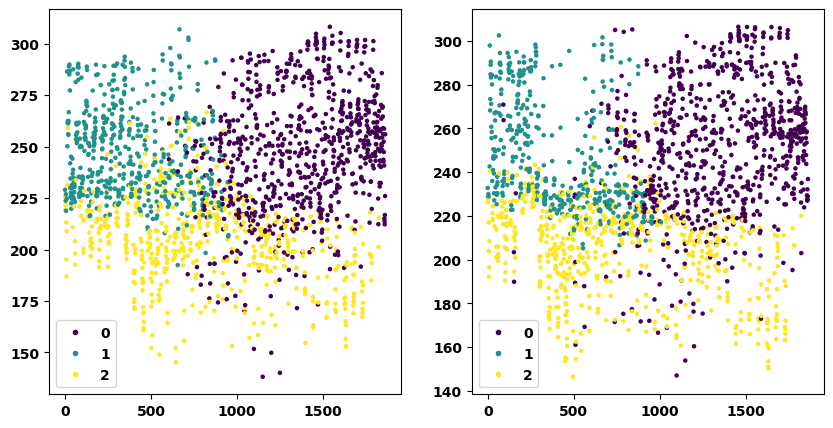

In [91]:
f=plt.figure(figsize=(10,5))

c1=np.array(clases['Clases'])
c2=np.array(clases_data['Clases'])
x=np.arange(0,len(c1),1)

plt.subplot(121)

scatter=plt.scatter(x,np.array(clases['Ancho_espectral']), c=c1, s=5,marker='o')

# Create a legend
labels = np.unique(c1)
handles = [plt.Line2D([],[],marker="o",markersize=3, ls='', color=scatter.cmap(scatter.norm(i))) for i in labels]
plt.legend(handles, labels)

# Show the plot


plt.subplot(122)
scatter=plt.scatter(x,np.array(clases_data['Ancho_espectral']), c=c2, s=5,marker='o')
labels = np.unique(c2)
handles = [plt.Line2D([],[],marker="o",markersize=3, ls='', color=scatter.cmap(scatter.norm(i))) for i in labels]
plt.legend(handles, labels)

# Show the plot
